# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte, verbreitet dieser Beitrag falsche Informationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

In diesem Lernmodul sollen mithilfe computergestützter Methoden auf jene Fragen eine Antwort gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) über die verfügbaren Daten (hier: Textbeiträge) treffen kann, müssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und der folgenden Bibliotheken durch.

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
    2. [Textdaten klassifizieren](#klassifizieren)
4. Verwendung
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Dies geschieht in der Datendomäne. Daraufhin bewegen sich die Teilnehmer in der Modelldomäne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analyses)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Ihr könnt euch bestimmt vorstellen, dass die Erzeugung von gänzlich Neuem aufwendiger ist, als das Entscheiden über vorliegende Inhalte und so beschäftigt sich dieses Lernmodul mit der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, welche die Grundgesamtheit des Datensatzes bilden. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann.

Im späteren Verlauf werden wir von der Daten- in die Modelldomäne voranschreiten. Hier werden einzelne Merkmale verworfen, andere wiederum für eine Modellvorhersage herangezogen. Mehr dazu im Abschnitt 3, denn zunächst beschaffen wir uns die Daten...

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

Zu Beginn holen wir uns die benötigten Daten mithilfe von Pandas aus einem ZIP-Archiv.

In [2]:
twitter = pd.read_json('./tweets.json.gz', compression='gzip')

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie sehen unsere Daten aus?

In [3]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.1-b,status,1212046141279354880,1.140992e+18,2019-12-31 16:21:33+00:00,2019-12-31 16:21:39.286956+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.1-b,status,1212046145645662208,7.137519e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.657847+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.1-b,status,1212046145737961472,7.158583e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.700276+00:00,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.1-b,status,1211821086905683968,1.106642e+18,2019-12-31 01:27:16+00:00,2019-12-31 16:21:40.016141+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1582.0,4518,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.1-b,status,1212046149990916096,9.990299e+08,2019-12-31 16:21:35+00:00,2019-12-31 16:21:40.711065+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wie viele Werte liegen insgesamt vor?

In [4]:
twitter.size

1300000

Wie viele Beispiele liegen insgesamt vor?

In [5]:
twitter.shape[0]

50000

50.000 Beispiele sind ein paar Beispiele zu viel. Wir machen mit lediglich 100 Beispielen wie folgt weiter...

In [6]:
twitter = twitter[:100]

Wie viele Werte liegen pro Beispiel vor?

In [7]:
twitter.shape[1]

26

Welche Merkmale bzw. Wertetypen liegen vor?

In [8]:
twitter.dtypes

twista                        object
type                          object
id                             int64
user                         float64
created_at       datetime64[ns, UTC]
recorded_at      datetime64[ns, UTC]
source                        object
retweets                     float64
favourites                     int64
lang                          object
hashtags                      object
urls                          object
mentions                      object
mentioned_ids                 object
text                          object
name                          object
screen_name                   object
location                      object
description                   object
url                           object
verified                     float64
followers                    float64
friends                      float64
listed                       float64
statuses                     float64
refers_to                    float64
dtype: object

Das Merkmal _lang_ schauen wir uns als Erstes an. Welche Sprachen sind vertreten?

In [9]:
twitter['lang'].unique()

array(['de', 'en', 'tr', 'pt', 'es'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [10]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame _twitter_ in eine DataSeries _tweets_.

In [11]:
tweets = twitter['text']
tweets.head()

0    Hahaha.., da haben "die Nazis" aber Glück 🍀 ge...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    31.12.2019. Breitscheidplatz. Weihnachtsmarkt....
4    Wir wünschen allen ein friedliches  und sorgen...
Name: text, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...

In [12]:
tweets = tweets.replace(regex={'[^a-zA-ZäöüßÄÖU\s]' : ''})
tweets.head()

0    Hahaha da haben die Nazis aber Glück  gehabt u...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3     Breitscheidplatz Weihnachtsmarkt Aus den Ster...
4    Wir wünschen allen ein friedliches  und sorgen...
Name: text, dtype: object

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:

In [13]:
tweets = tweets.str.split()
tweets.head()

0    [Hahaha, da, haben, die, Nazis, aber, Glück, g...
1    [Ich, wünsche, allen, guten, Menschen, ein, ge...
2    [Wir, wünschen, euch, einen, guten, Rutsch, un...
3    [Breitscheidplatz, Weihnachtsmarkt, Aus, den, ...
4    [Wir, wünschen, allen, ein, friedliches, und, ...
Name: text, dtype: object

Als Nächstes sollen sog. Stopp-Wörter, also Wörter, die den Lesefluss stören, entfernt werden. Wie viele Wörter wären betroffen?

In [14]:
stop_words = ['und', 'oder', 'der', 'die', 'das', 'er', 'sie', 'es']

In [15]:
def content_fraction(text):
    content = [word for word in text if word not in stop_words]
    return len(content) / len(text)

In [16]:
content_fraction(tweets.aggregate(np.concatenate))

0.9257081774452165

8 % Verlust klingt verkraftbar. Dann werfen wir den Filter mal an.

In [17]:
def filter_tokens(data):
    row_list = []
    for row in data:
        token_list = []
        for token in row:
            if token not in stop_words:
                token_list.append(token)
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [18]:
tweets = filter_tokens(tweets)

Rufen wir die Verlustfunktion erneut auf, meldet sich wie erwartet keine Verluste.

In [19]:
content_fraction(tweets.aggregate(np.concatenate))

1.0

Wie viele Wörter sind im längsten Tweet enthalten?

In [20]:
tweets_length = [len(tweet) for tweet in tweets]
np.max(tweets_length)

43

Wie viele Tweets haben eine bestimmte Länge? Die folgende Funktion _plot_tweet_length_distribution_ hilft uns dabei:

In [21]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

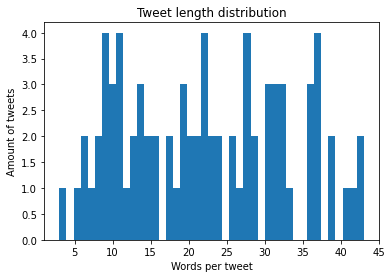

In [22]:
plot_tweet_length_distribution(tweets_length)

Wie lauten die am häufigsten verwendeten Wörter? Dabei hilft uns die Funktionalität [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist), welche eine Häufigkeitsverteilung über alle Wörter bildet.

In [23]:
from nltk.probability import FreqDist
fd = FreqDist(tweets.aggregate(np.concatenate))

Wie lauten jetzt die zehn häufigsten Wörter?

In [24]:
fd.most_common(10)

[('ein', 30),
 ('in', 21),
 ('Ich', 20),
 ('Jahr', 18),
 ('für', 17),
 ('den', 16),
 ('an', 16),
 ('nicht', 15),
 ('auf', 14),
 ('mit', 12)]

Wie sieht das Histogramm dazu aus?

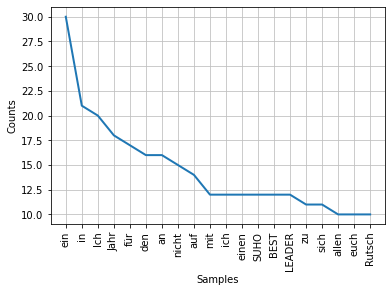

In [25]:
fd.plot(20)

Neben dem Histogramm lässt sich auch eine sog. Schlagwort-Wolke aus den Wörtern erzeugen. Dazu nutzen wir die Funktionalität von [WordCloud](http://amueller.github.io/word_cloud/index.html).

In [26]:
from wordcloud import WordCloud
wc = WordCloud()

Da wir im vorherigen Schritt bereits die Wortverteilung berechnet haben, lässt sich diese im folgenden wiederverwenden.

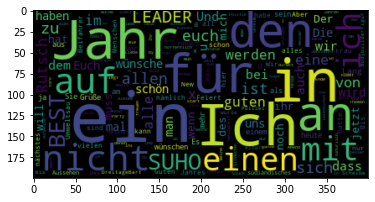

In [27]:
plt.imshow(wc.generate_from_frequencies(fd), interpolation="bilinear")
plt.show()

## 3. <a id='modell'>Modell</a>

### 3.1 <a id='einbetten'>Textdaten einbetten</a>

#### 3.1.1 Vokabular

In [28]:
positive = pd.read_csv('./positive.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Score', 'Declination'])
positive['Stimmung'] = 'positiv'

negative = pd.read_csv('./negative.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Score', 'Declination'])
negative['Stimmung'] = 'negativ'

vocab = pd.concat([negative, positive])
assert positive.size + negative.size == vocab.size
vocab.head()

,Wort,Score,Declination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ
1,Abdankung|NN,-0.0048,Abdankungen,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ
4,Abfuhr|NN,-0.3367,Abfuhren,negativ


Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.

In [29]:
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

,Wort,Score,Declination,Stimmung,Typ
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ,NN
1,Abdankung,-0.0048,Abdankungen,negativ,NN
2,Abdämpfung,-0.0048,Abdämpfungen,negativ,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ,NN
4,Abfuhr,-0.3367,Abfuhren,negativ,NN


Fehlende Werte werden mit einer leeren Zeichenkette ersetzt.

In [30]:
vocab = vocab.fillna('')

Als Nächstes werden die Deklinationen eines Wortes als eigenes Wort hinterlegt.

In [31]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Declination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Declination'], axis=1)
vocab

,Stamm,Score,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen
...,...,...,...,...,...
32076,üppig,0.2010,positiv,ADJX,üppigster
32077,üppig,0.2010,positiv,ADJX,üppiges
32078,üppig,0.2010,positiv,ADJX,üppig
32079,üppig,0.2010,positiv,ADJX,üppigsten


Welche Wort-Typen sind vorhanden?

In [32]:
vocab.groupby('Typ').count()

,Stamm,Score,Stimmung,Wort
Typ,,,,
ADJX,22960,22960,22960,22960
ADV,37,37,37,37
NN,3182,3182,3182,3182
VVINF,5902,5902,5902,5902


Finde das Adjektiv _gut_ im Vokabular.

In [33]:
vocab.loc[vocab['Wort'] == 'gut']

,Stamm,Score,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


Finde die ersten zehn Adverben im Vokabular.

In [34]:
vocab.loc[vocab['Typ'] == 'ADV'][:10]

,Stamm,Score,Stimmung,Typ,Wort
4786,aufwärts,0.0040,positiv,ADV,aufwärts
4787,aufwärts,0.0040,positiv,ADV,
6330,bergab,-0.0048,negativ,ADV,
6331,bergab,-0.0048,negativ,ADV,bergab
6603,besonders,0.5391,positiv,ADV,
6604,besonders,0.5391,positiv,ADV,besonders
6689,bestens,0.0808,positiv,ADV,
6690,bestens,0.0808,positiv,ADV,bestens
14558,herunter,-0.0048,negativ,ADV,herunter
14559,herunter,-0.0048,negativ,ADV,


In [35]:
corpus = {'negativ' : vocab.loc[vocab['Stimmung'] == 'negativ'], 'positiv' : vocab.loc[vocab['Stimmung'] == 'positiv']}

### 3.1.2 Labels

In [36]:
def get_labels(sequence):
    score = 0.0
    for token in sequence:
        row = vocab.loc[vocab['Wort'] == token]
        if len(row) == 1:
            score += row['Score'].to_numpy()
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

### 3.1.3 Features

In [37]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [38]:
negative_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'negativ']['Wort']), 'negativ')]
positive_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'positiv']['Wort']), 'positiv')]
train_set = negative_features + positive_features

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

In [39]:
from nltk import NaiveBayesClassifier

In [40]:
classifier = NaiveBayesClassifier.train(train_set)

In [41]:
def compare_classifier(data, examples=100):
    
    print('#\tNaiv\tNLTK\t∆ Beispiel')
    
    data = data[:examples]
    for example in data.iteritems():
        
        # Naive classifier
        naive = get_labels(example[1])
        
        # NLTK classifier
        features = word_feats(example[1])
        nltk = classifier.classify(features)
        
        if naive != nltk:
            delta = 'X '
        else:
            delta = '  '
            
        print('%i\t%s\t%s\t%s%.160s' % (example[0], naive, nltk, delta, ' '.join(example[1])))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [42]:
classifier.classify(word_feats("Was für ein schlechtes Lernmodul".split()))

'negativ'

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [43]:
classifier.classify(word_feats("Was für ein gutes Lernmodul".split()))

'positiv'

In [44]:
compare_classifier(tweets, examples=50)

#	Naiv	NLTK	∆ Beispiel
0	positiv	positiv	  Hahaha da haben Nazis aber Glück gehabt was für ein Glück Hust Welcher Mann bitteschön würde denn mit DER na Ihr wisst schon httpstcoaiauMU
1	positiv	positiv	  Ich wünsche allen guten Menschen ein gesundes glückliches Jahr Nur denen aus berzeugung afd wählen denen wünsch ich ein richtig Beschissenes Viele Grüße
2	positiv	positiv	  Wir wünschen euch einen guten Rutsch für neue Jahr nur Beste Lasst krachen feiert schön jurahannover conticampus leibnizuniversität unihannover hannover hannove
3	negativ	negativ	  Breitscheidplatz Weihnachtsmarkt Aus den Stereoboxen erklingt ein stimmungsschweres FUCK YOU I WONT DO WHAT YOU TELL ME Guten Rutsch
4	positiv	positiv	  Wir wünschen allen ein friedliches sorgenfreies Jahr a git Rosch httpstcojBKdgggOe
5	neutral	positiv	X Die Satirepartei Die Partei will KlimaWissenschaftler auf den vorderen Listenplätzen bei Bundestagswahl platzieren Sonneborn httpstcojXPKgEgC
6	positiv	negativ	X Der UmweltsauStreit zeigt

<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>